In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pypyodbc as podbc           

In [91]:
driver = '{MySQL ODBC 8.0 ANSI Driver}' # MySQL ODBC 8.0 ANSI Driver
server = 'localhost'
database = 'gestion_notes_development'
username = 'root'
password = ''
conn = podbc.connect(Driver=driver, Server=server, Database=database, Uid=username, Pwd=password)

In [103]:
df = pd.read_sql('''SELECT * FROM roles''', conn)
df

,id,libelle,created_at,updated_at
0,1,Directeur Général,2021-02-06 16:06:41.475579,2021-02-06 16:06:41.475579
1,2,Directeur des Enseignements,2021-02-06 16:06:41.515275,2021-02-06 16:06:41.515275
2,3,Coordonnateur de filière,2021-02-06 16:06:41.519194,2021-02-06 16:06:41.519194
3,4,Chef de departement,2021-02-06 16:06:41.522488,2021-02-06 16:06:41.522488
4,5,Enseignant,2021-02-06 16:06:41.525927,2021-02-06 16:06:41.525927
5,6,Admin,2021-02-06 16:06:41.529280,2021-02-06 16:06:41.529280


In [68]:
driver = '{Oracle dans OraDb11g_home1}'
server = 'localhost'
database = 'aerien_db'
username = 'system'
password = 'Oracle2014'
conn1 = podbc.connect(Driver=driver, Server=server, Database=database, Uid=username, Pwd=password)

In [90]:
dt = pd.read_sql('''SELECT * FROM employes e, services s WHERE e.id_emp = s.id_ser;''', conn1)
dt

C:\Users\Rostaing\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id_emp,nom,prenom,date_naissance,genre,id_ser,id_ser,libelle
0,1.0,Davila,Rostaing,2000-10-15,M,2.0,1.0,Sercice G?n?ral
1,2.0,Chris,Espira,1885-03-05,M,2.0,2.0,Sercice Technique
2,3.0,Banzouzi,Chistopher,1884-03-05,M,1.0,3.0,Sercice Commercial
3,4.0,Ng,Nova,2000-10-15,F,3.0,4.0,Sercice Financier
4,5.0,Julia,Dina,2008-07-10,F,4.0,5.0,Sercice Marketing


In [87]:
dt["date_naissance"].mode()

0   2000-10-15
Name: date_naissance, dtype: datetime64[ns]

In [124]:
driver = '{SQLite3 ODBC Driver}'
server = 'localhost'
database = 'database.sqlite'
trusted_connection = 'yes'
conn2 = podbc.connect(Driver=driver, Server=server, Database=database, Trusted_connection=trusted_connection)

In [125]:
df = pd.read_csv("Demo 2_ Perform hierarchical clustering.csv")
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [126]:
X = df[["female", "math"]]
X.head()

,female,math
0,0,41
1,1,53
2,0,54
3,0,47
4,0,57


In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   female  200 non-null    int64
 1   math    200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [128]:
X.shape

(200, 2)

In [129]:
X["female"].value_counts()

1    109
0     91
Name: female, dtype: int64

In [130]:
X["math"].value_counts()

57    13
49    10
54    10
40    10
46     8
51     8
45     8
50     7
61     7
43     7
41     7
53     7
42     7
56     7
52     6
39     6
58     6
48     5
55     5
63     5
64     5
60     5
71     4
44     4
62     4
66     4
72     3
65     3
47     3
67     2
69     2
38     2
59     2
75     2
73     1
70     1
35     1
68     1
37     1
33     1
Name: math, dtype: int64

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


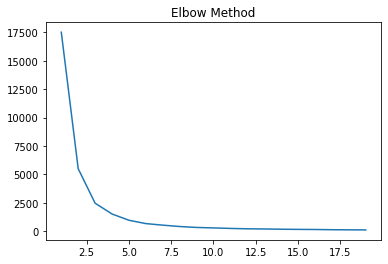

In [132]:
inertia = []
k_range = range(1, 20)

for k in k_range:
    km = KMeans(n_clusters=k, init="k-means++", random_state=0).fit(X)
    inertia.append(km.inertia_)
    
plt.plot(k_range, inertia);
plt.title("Elbow Method");

In [150]:
model = KMeans(n_clusters=4, init="k-means++", random_state=0)
model.fit(X)
predictions = model.predict(X)
predictions

array([0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 1, 1, 1, 0, 3,
       0, 1, 0, 0, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 3, 0, 0, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 0, 1, 2, 3, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 2, 0, 1, 3, 1, 0, 0, 2, 1, 0, 2, 1, 2, 3, 2, 0, 1, 2, 0,
       0, 1, 3, 2, 3, 2, 0, 1, 3, 3, 0, 3, 1, 1, 2, 2, 2, 3, 3, 0, 0, 3,
       0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 1, 2, 2, 0, 3, 2, 2, 2, 3, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 3,
       1, 2, 0, 1, 2, 2, 1, 2, 3, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       1, 3])

In [145]:
from sklearn.metrics import silhouette_score

In [147]:
label = model.labels_
silhouette_score(X, label)

0.5730565645178796

In [ ]:
driver = '{MongoDB ODBC 1.4.3 ANSI Driver}' # MySQL ODBC 8.0 ANSI Driver
server = 'localhost'
port = '27017'
database = 'test'
username = 'root'
password = ''
conn = podbc.connect(Driver=driver, Server=server, Port=port, Database=database, Uid=username, Pwd=password)

In [ ]:
dm = pd.read_sql('''db.agents.find()''', conn)
dm